<a href="https://www.kaggle.com/code/shubhamgupta012/eda-and-visualization-on-anime-and-other-insights?scriptVersionId=134792987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist-dataset/user-filtered.csv
/kaggle/input/myanimelist-dataset/anime-filtered.csv
/kaggle/input/myanimelist-dataset/final_animedataset.csv


# Anime Dataset

In [2]:
anime = pd.read_csv('/kaggle/input/myanimelist-dataset/anime-filtered.csv')
pd.set_option('display.max_columns', None)
anime.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [3]:
anime.shape

(14952, 25)

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [5]:
anime.describe()

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.000000,14952.000000,13231.000000,14952.000000,1.495200e+04,14952.000000,14952.000000,1.495200e+04,14952.000000,14952.000000
mean,19017.432718,6.511526,6829.853828,7465.970907,4.068648e+04,537.629882,2619.806715,2.594310e+04,1121.307986,1377.861891
std,14588.758618,0.807185,4168.929475,4313.169381,1.348744e+05,4399.016449,15190.098642,9.812729e+04,4613.759597,5110.874501
min,1.000000,1.850000,1.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4602.500000,6.080000,3309.500000,3732.000000,7.360000e+02,1.000000,27.000000,2.460000e+02,14.000000,48.000000
50%,16729.000000,6.510000,6618.000000,7466.500000,3.493500e+03,6.000000,127.000000,1.515500e+03,78.000000,102.000000
75%,33513.250000,7.010000,9942.000000,11194.000000,1.919325e+04,47.000000,723.000000,9.797000e+03,388.250000,377.000000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000


In [6]:
anime.dtypes

anime_id           int64
Name              object
Score            float64
Genres            object
English name      object
Japanese name     object
sypnopsis         object
Type              object
Episodes          object
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked           float64
Popularity         int64
Members            int64
Favorites          int64
Watching           int64
Completed          int64
On-Hold            int64
Dropped            int64
dtype: object

Only Sypnopsis and Ranked column have null values as for now we do not need both columns so we will ignore it for now and if it is used in further analysis then we will deal with it.

In [7]:
anime.isnull().sum()

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

No Duplicates values

In [8]:
anime.duplicated().sum()

0

First we are going to check which columns are categorical and then print their value counts

In [9]:
anime['Type'].value_counts()

TV         4650
OVA        3364
Movie      2636
Special    1991
ONA        1531
Music       744
Unknown      36
Name: Type, dtype: int64

In [10]:
anime['Studios'].value_counts()

Unknown                        4912
Toei Animation                  695
Sunrise                         477
J.C.Staff                       356
Madhouse                        323
                               ... 
Tokyo Media Connections           1
Studio Unicorn                    1
Public & Basic, Ripple Film       1
Primastea                         1
Studio Kafka                      1
Name: Studios, Length: 1048, dtype: int64

In [11]:
anime['Source'].value_counts()

Manga            3764
Original         3720
Unknown          2974
Visual novel      988
Game              829
Light novel       768
Novel             485
Other             444
4-koma manga      277
Web manga         237
Music             215
Book               87
Picture book       76
Card game          64
Digital manga      15
Radio               9
Name: Source, dtype: int64

In [12]:
anime['Duration'].value_counts().head(10)

24 min. per ep.    1706
23 min. per ep.    1057
25 min. per ep.     818
30 min. per ep.     730
Unknown             460
3 min. per ep.      363
3 min.              362
2 min.              349
4 min.              345
5 min. per ep.      308
Name: Duration, dtype: int64

In [13]:
anime['Rating'].value_counts()

PG-13 - Teens 13 or older         5975
G - All Ages                      3770
Rx - Hentai                       1342
PG - Children                     1192
R - 17+ (violence & profanity)    1150
R+ - Mild Nudity                   970
Unknown                            553
Name: Rating, dtype: int64

In [14]:
anime['Genres'].value_counts().head(10)

Hentai                   967
Comedy                   557
Music                    526
Slice of Life            161
Dementia                 155
Kids                     153
Slice of Life, Comedy    152
Fantasy                  132
Drama                    105
Comedy, Slice of Life    100
Name: Genres, dtype: int64

In [15]:
anime['Licensors'].value_counts().head(10)

Unknown                 11007
Funimation                883
Sentai Filmworks          652
Media Blasters            206
Discotek Media            194
Aniplex of America        177
ADV Films                 148
VIZ Media                 138
Central Park Media         86
Bandai Entertainment       84
Name: Licensors, dtype: int64

In [16]:
anime['Producers'].value_counts().head(10)

Unknown                6152
NHK                     201
Pink Pineapple          183
Sanrio                  125
Bandai Visual           117
Fuji TV                 106
Aniplex                 104
TV Tokyo                 96
TV Asahi                 79
Tokyo Movie Shinsha      68
Name: Producers, dtype: int64

In [17]:
anime['Premiered'].value_counts()

Unknown        10456
Spring 2017       74
Fall 2016         74
Spring 2018       74
Spring 2014       70
               ...  
Summer 1974        1
Winter 1963        1
Summer 1962        1
Summer 1986        1
Summer 1967        1
Name: Premiered, Length: 231, dtype: int64

In [18]:
anime['Aired'].value_counts().head(10)

Unknown           185
2021 to ?          40
2021               30
2004               28
Apr, 2021 to ?     28
2005               27
2008               26
2002               24
2003               24
2006               22
Name: Aired, dtype: int64

In [19]:
anime['Episodes'].value_counts()

1       6563
12      1399
2       1281
13       716
3        582
        ... 
330        1
193        1
1787       1
79         1
160        1
Name: Episodes, Length: 199, dtype: int64

In [20]:
import matplotlib.pyplot as plt

As we can see from below graph we plotted number of episodes each anime have and we can see that there were 6353 animes with only 1 episodes similiarly:
* there were 1399 anime with 12 episodes
* There were 1281 animes with 2 episodes
* There were 716 animes with 13 episoes


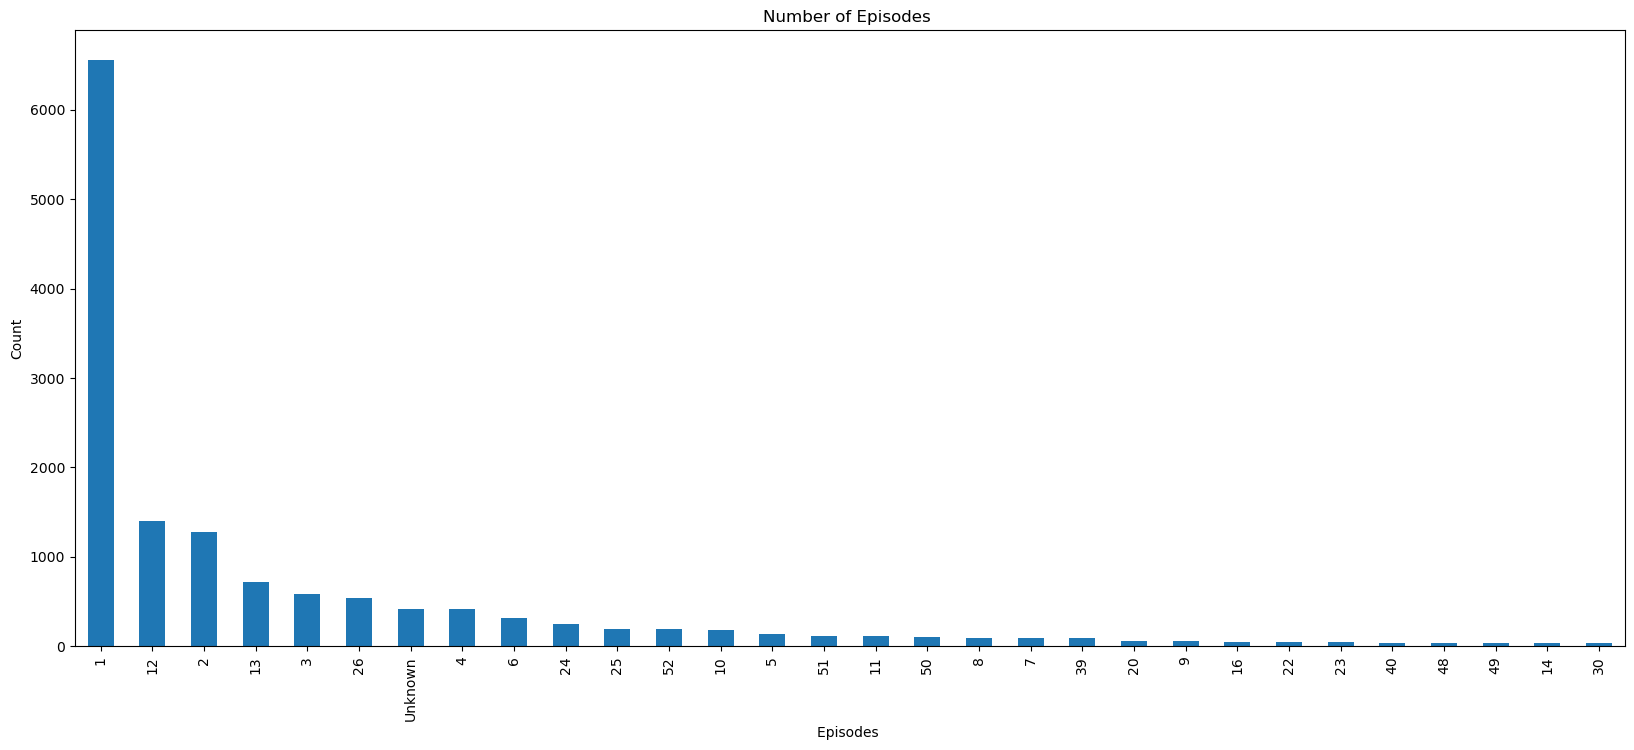

In [21]:
episode_counts = anime['Episodes'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,8))
episode_counts.plot(kind='bar')
plt.title('Number of Episodes ')
plt.xlabel('Episodes ')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

This graph shows us about the type of anime, such as TV series, movie, or OVA.
* TV         4650
* OVA        3364
* Movie      2636
* Special    1991
* ONA        1531
* Music       744
* Unknown      36

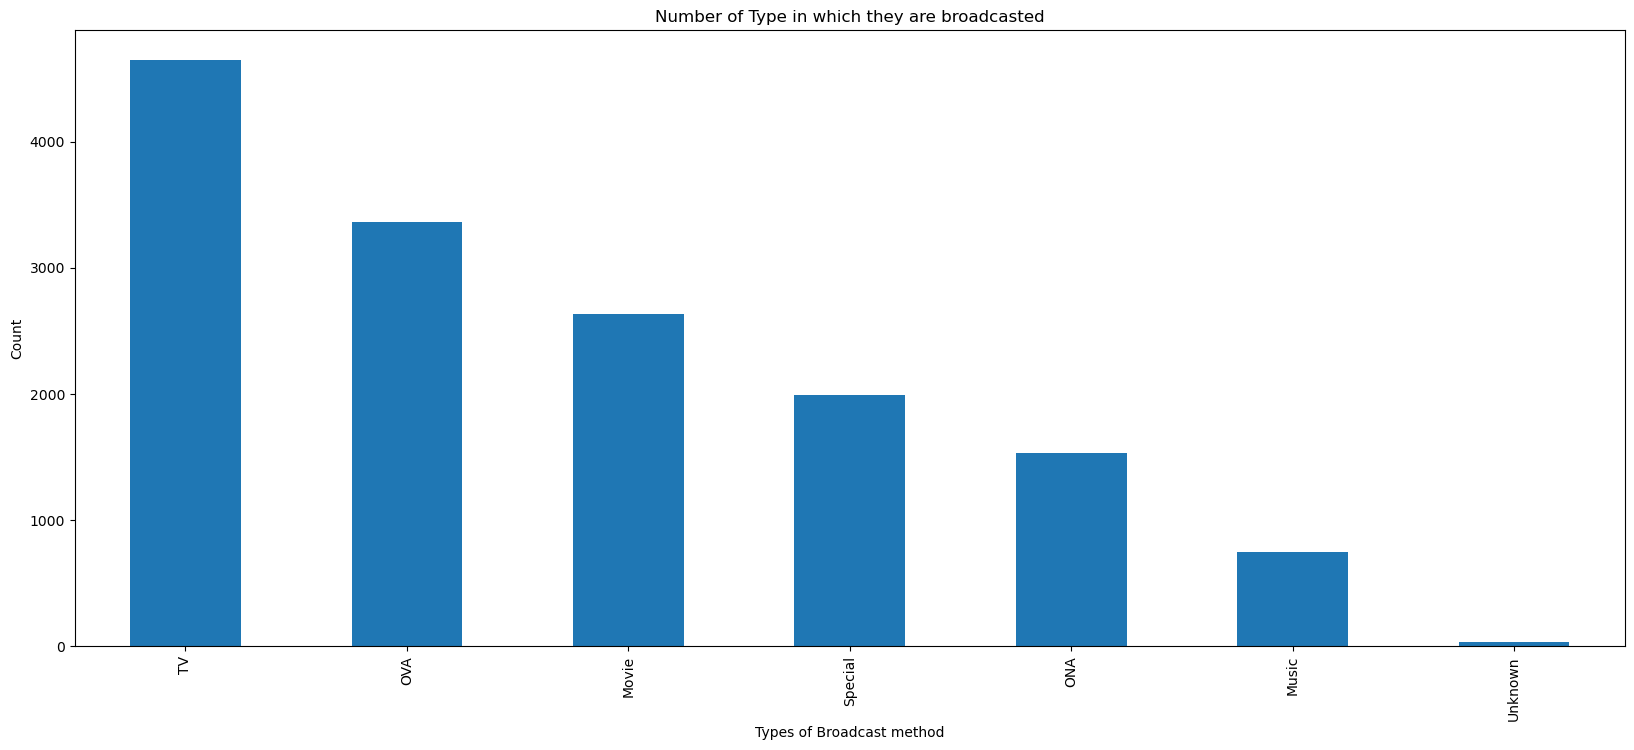

In [22]:
type_counts = anime['Type'].value_counts().head(7)

# Plotting the bar graph
plt.figure(figsize=(20,8))
type_counts.plot(kind='bar')
plt.title('Number of Type in which they are broadcasted')
plt.xlabel('Types of Broadcast method')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph shows about animation studios responsible for producing the anime.**
* Unknown                        4912
* Toei Animation                  695
* Sunrise                         477
* J.C.Staff                       356
* Madhouse                        323

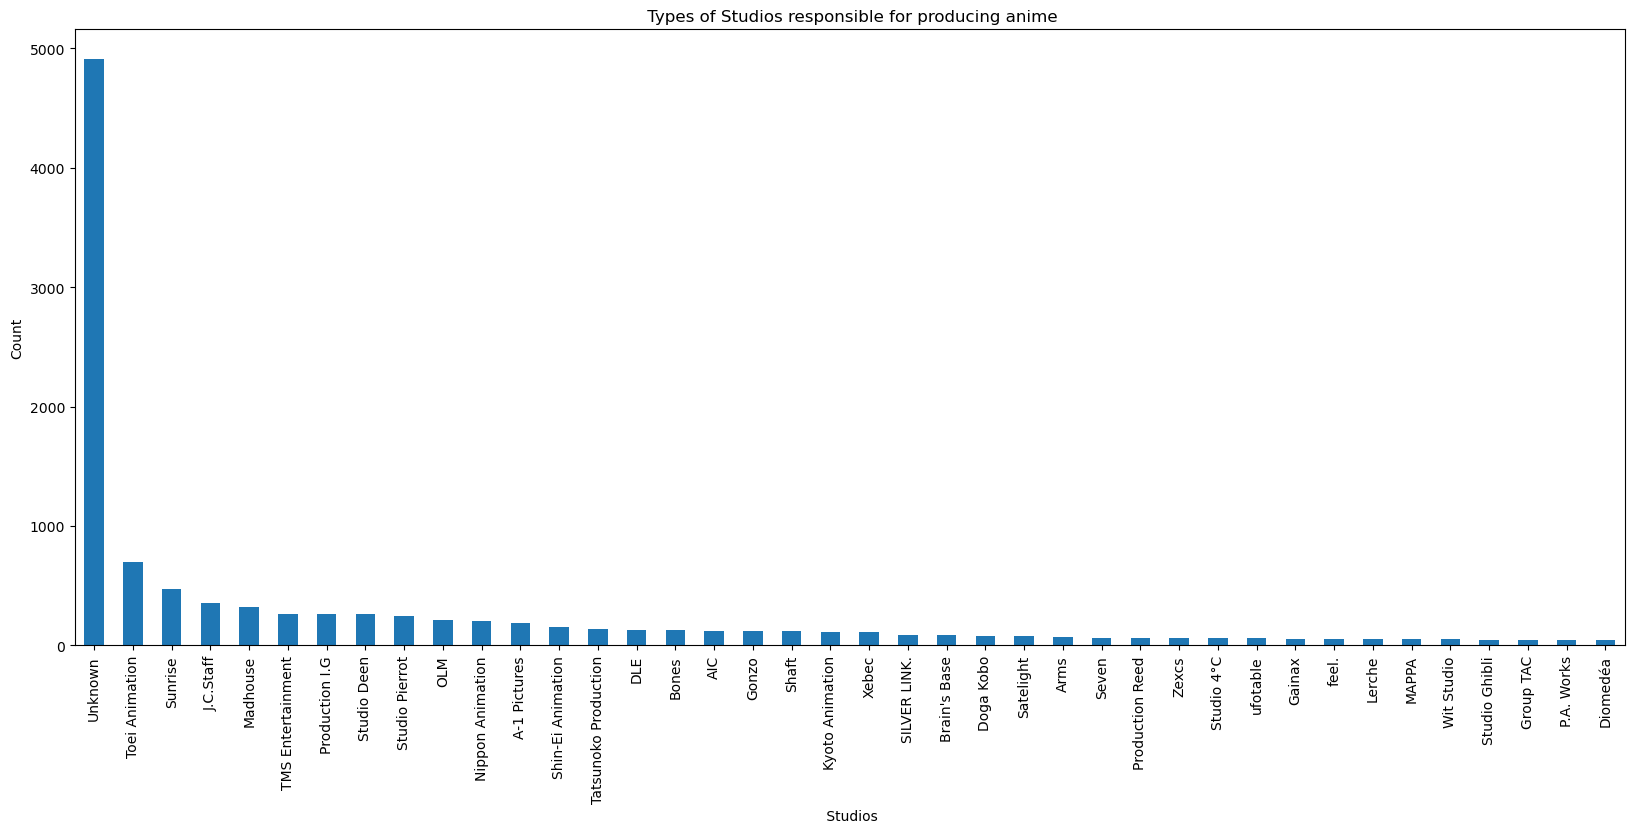

In [23]:
studio_counts = anime['Studios'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
studio_counts.plot(kind='bar')
plt.title(' Types of Studios responsible for producing anime')
plt.xlabel(' Studios')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph tell us about the source material for the anime, such as manga, light novel, or original.**
* Manga            3764
* Original         3720
* Unknown          2974
* Visual novel      988
* Game              829
* Light novel       768
* Novel             485
* Other             444
* 4-koma manga      277
* Web manga         237
* Music             215
* Book               87
* Picture book       76
* Card game          64
* Digital manga      15
* Radio               9

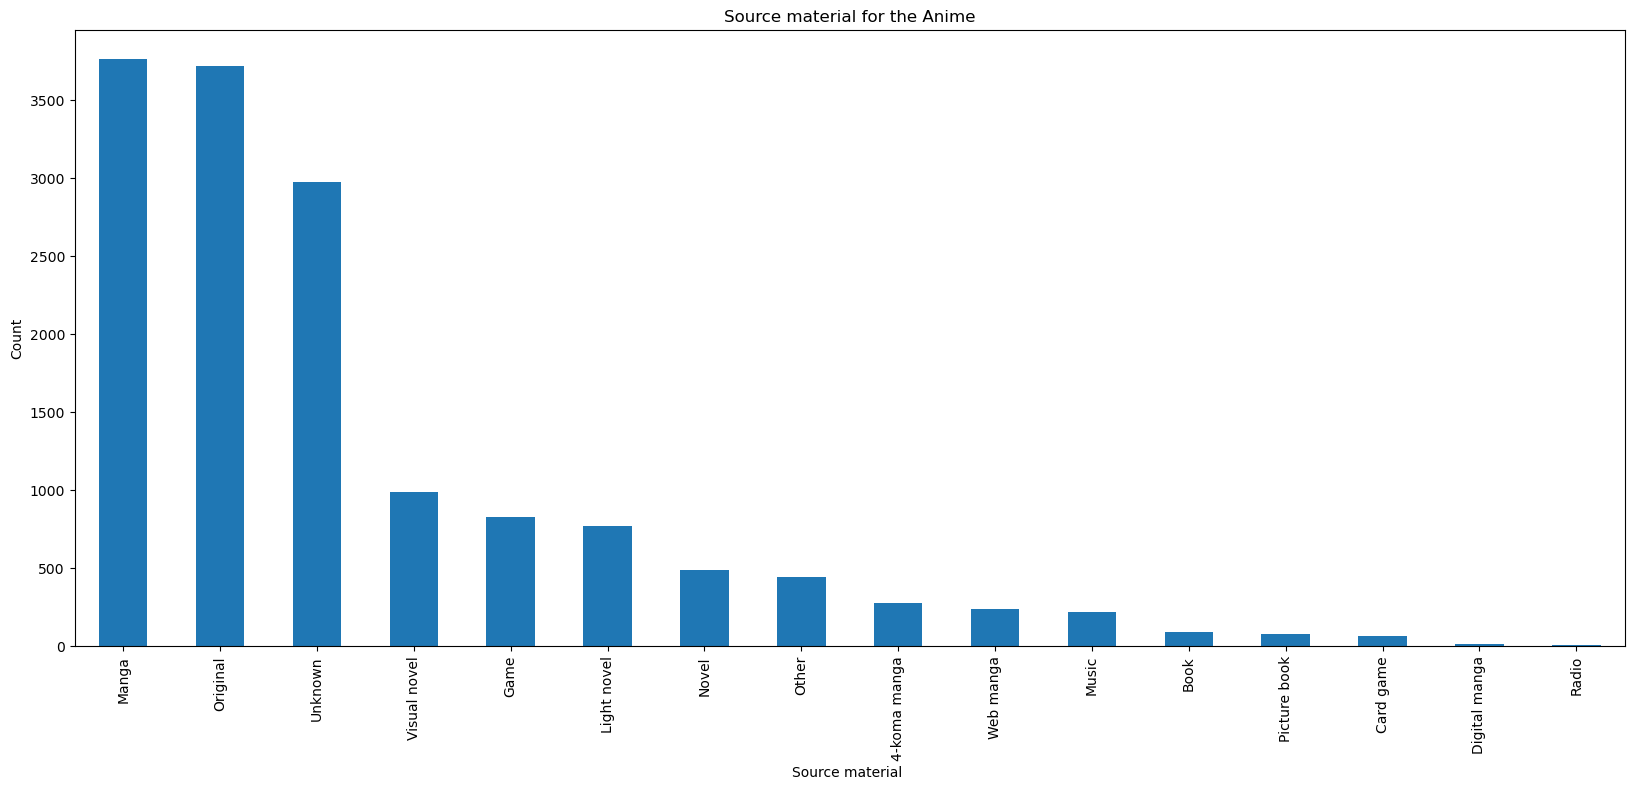

In [24]:
source_counts = anime['Source'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
source_counts.plot(kind='bar')
plt.title('Source material for the Anime')
plt.xlabel('Source material ')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph shows us about the duration of each episode.**
* 24 min. per ep.    1706
* 23 min. per ep.    1057
* 25 min. per ep.     818
* 30 min. per ep.     730
* Unknown             460
* 3 min. per ep.      363
* 3 min.              362
* 2 min.              349
* 4 min.              345
* 5 min. per ep.      308

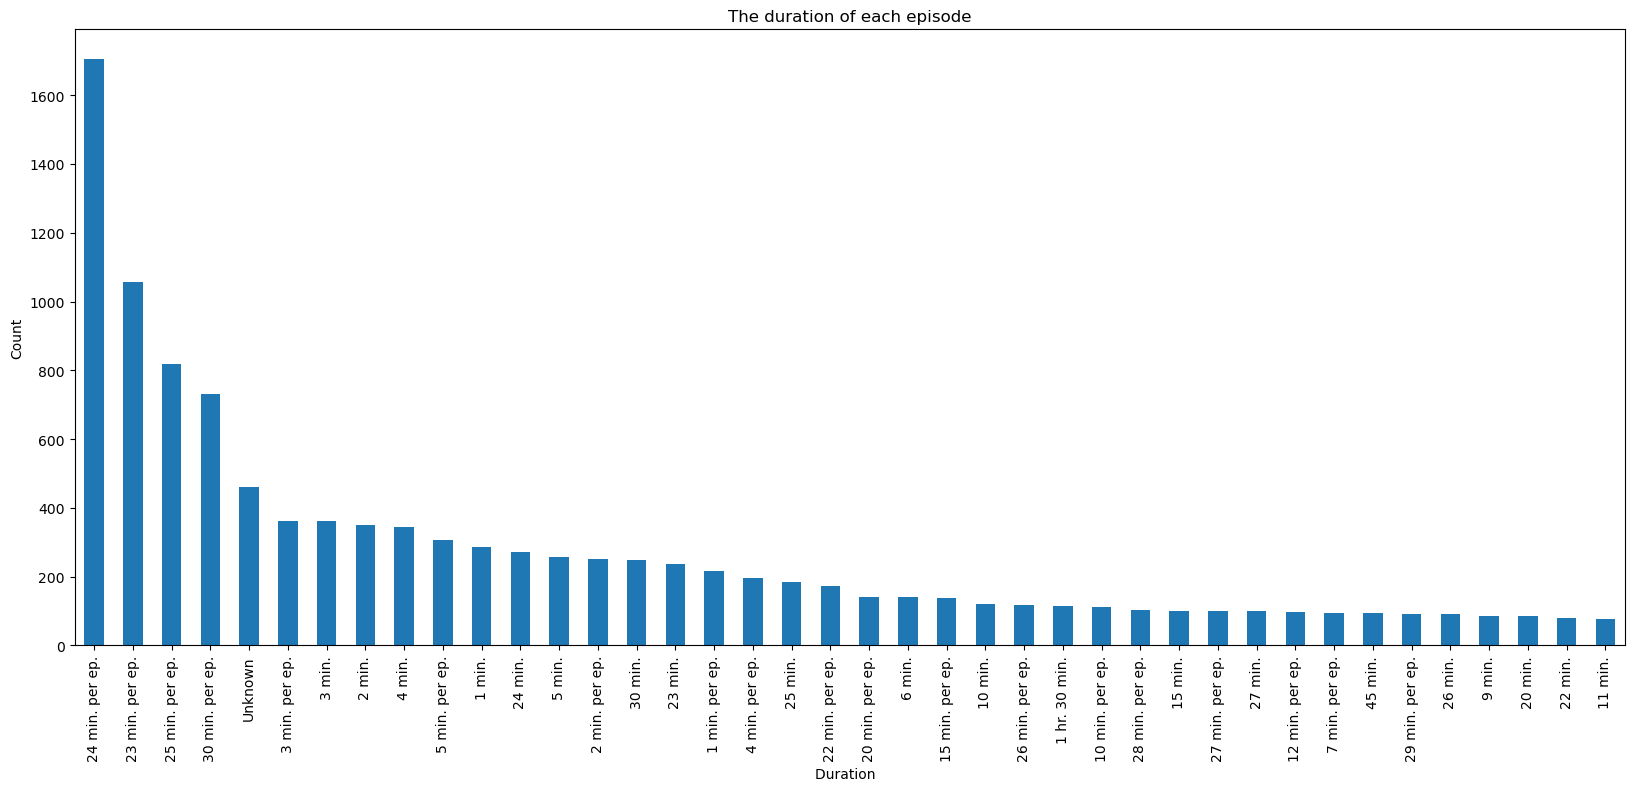

In [25]:
duration_counts = anime['Duration'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
duration_counts.plot(kind='bar')
plt.title('The duration of each episode')
plt.xlabel('Duration  ')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This grapg shows us about the target audience rating for the anime.**
* PG-13 - Teens 13 or older         5975
* G - All Ages                      3770
* Rx - Hentai                       1342
* PG - Children                     1192
* R - 17+ (violence & profanity)    1150
* R+ - Mild Nudity                   970
* Unknown                            553

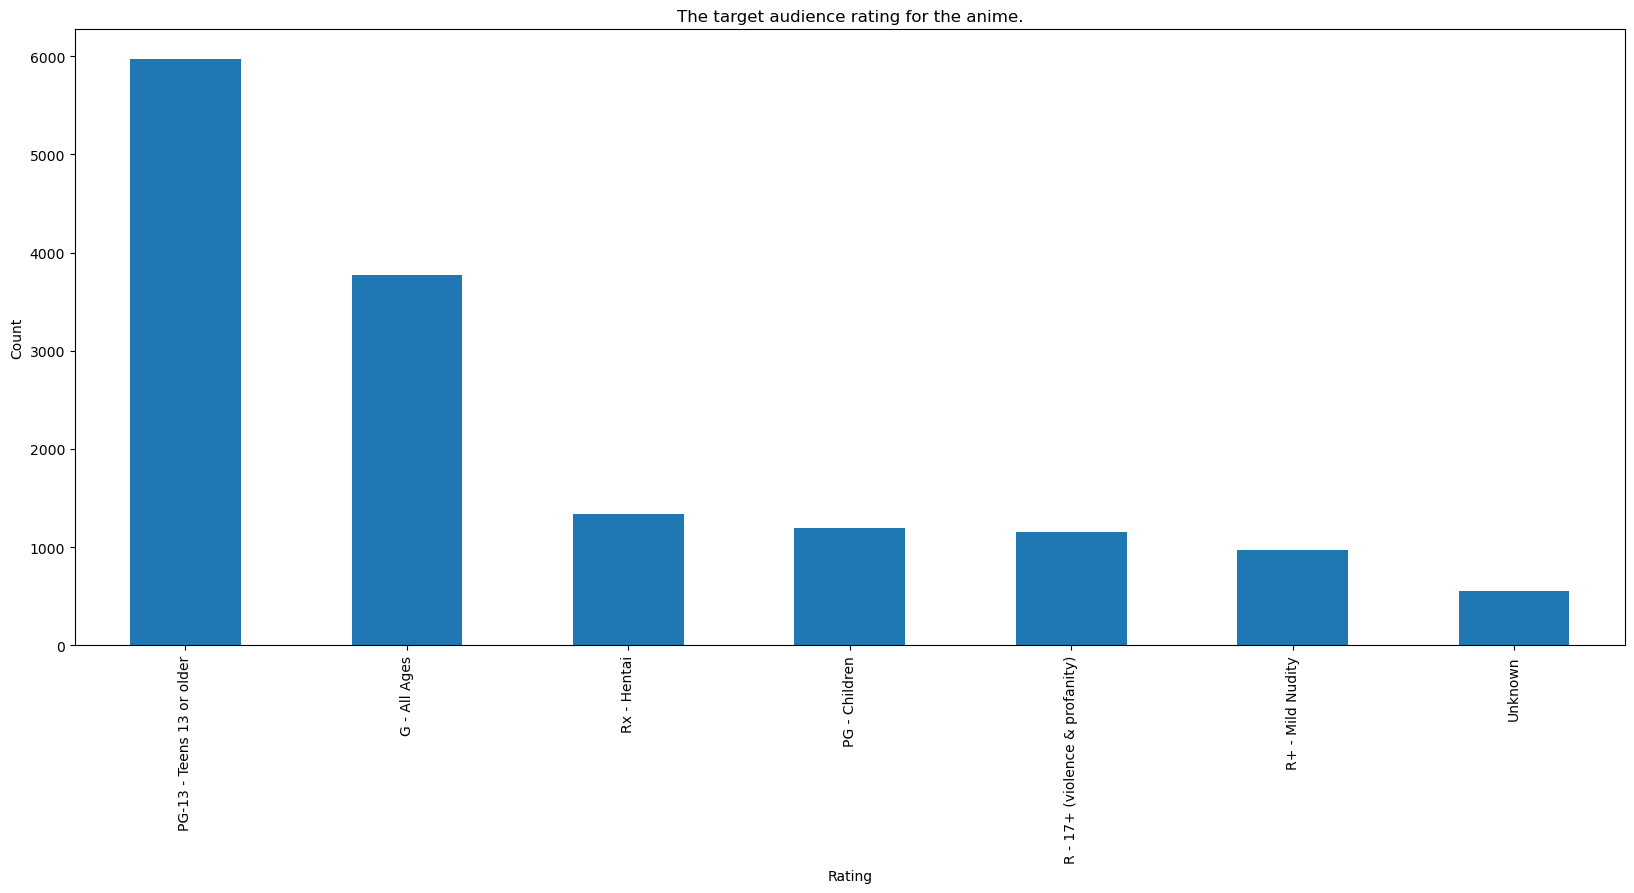

In [26]:
rating_counts = anime['Rating'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
rating_counts.plot(kind='bar')
plt.title('The target audience rating for the anime.')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph shows us about the companies that hold the license for distributing the anime.**
* Unknown                 11007
* Funimation                883
* Sentai Filmworks          652
* Media Blasters            206
* Discotek Media            194
* Aniplex of America        177
* ADV Films                 148
* VIZ Media                 138
* Central Park Media         86
* Bandai Entertainment       84

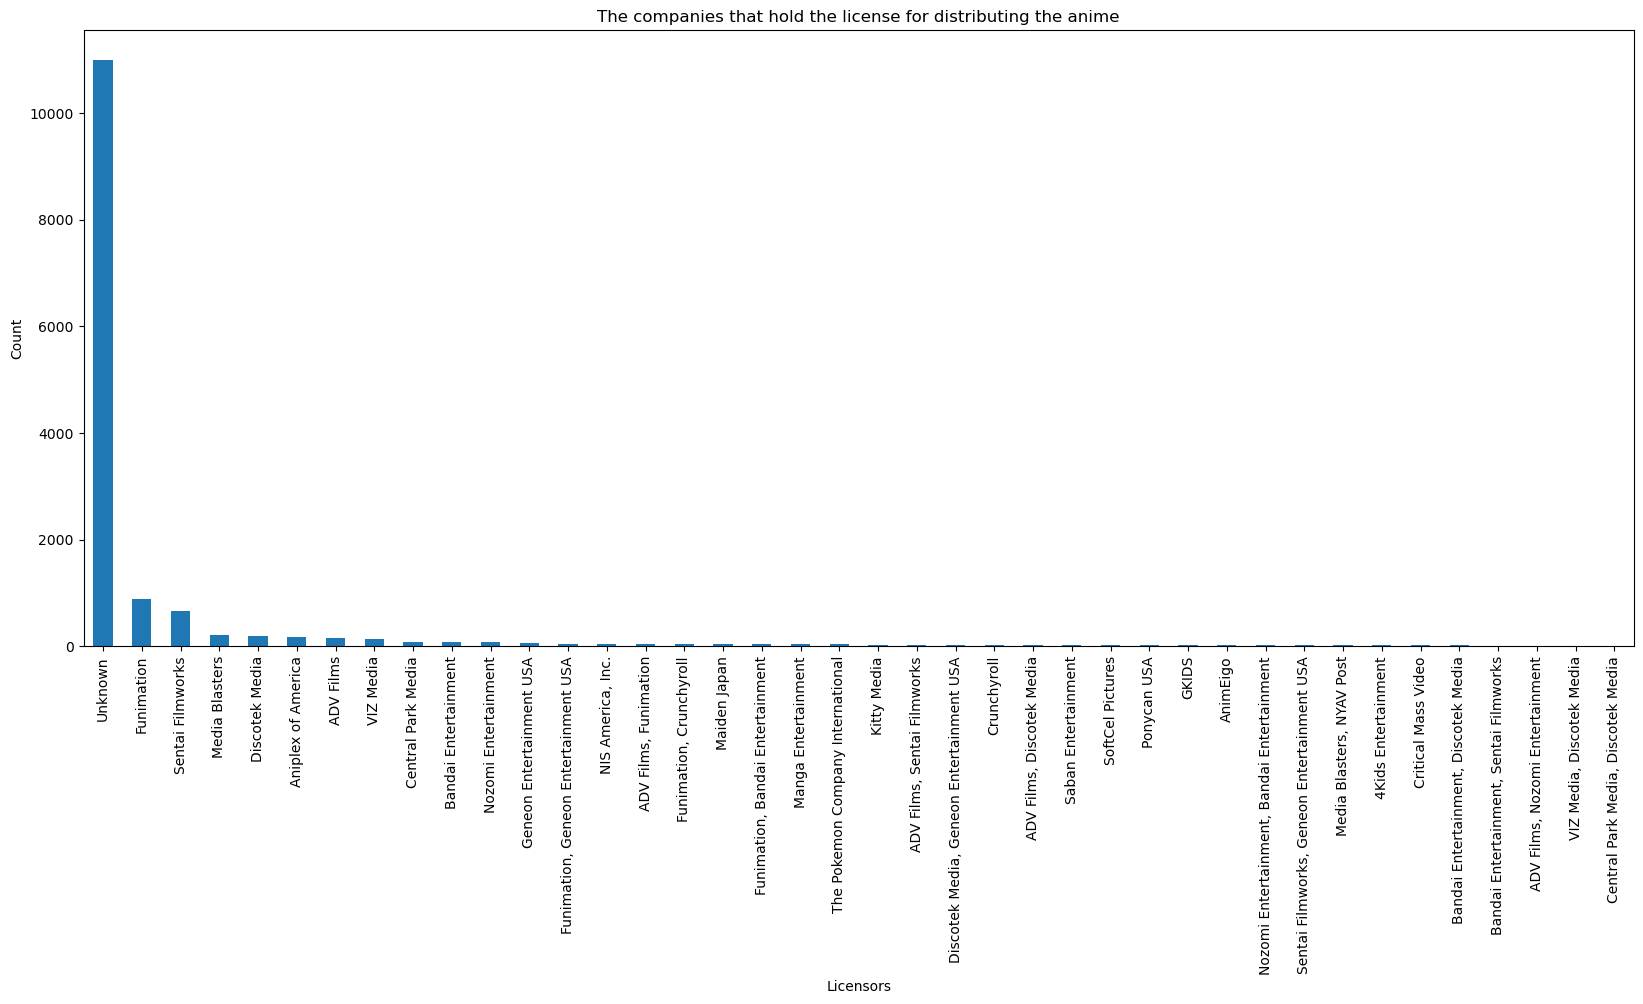

In [27]:
licensor_counts = anime['Licensors'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
licensor_counts.plot(kind='bar')
plt.title('The companies that hold the license for distributing the anime')
plt.xlabel('Licensors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph show us about the top genre(s) of the anime.**
* Hentai                   967
* Comedy                   557
* Music                    526
* Slice of Life            161
* Dementia                 155
* Kids                     153
* Slice of Life, Comedy    152
* Fantasy                  132
* Drama                    105
* Comedy, Slice of Life    100

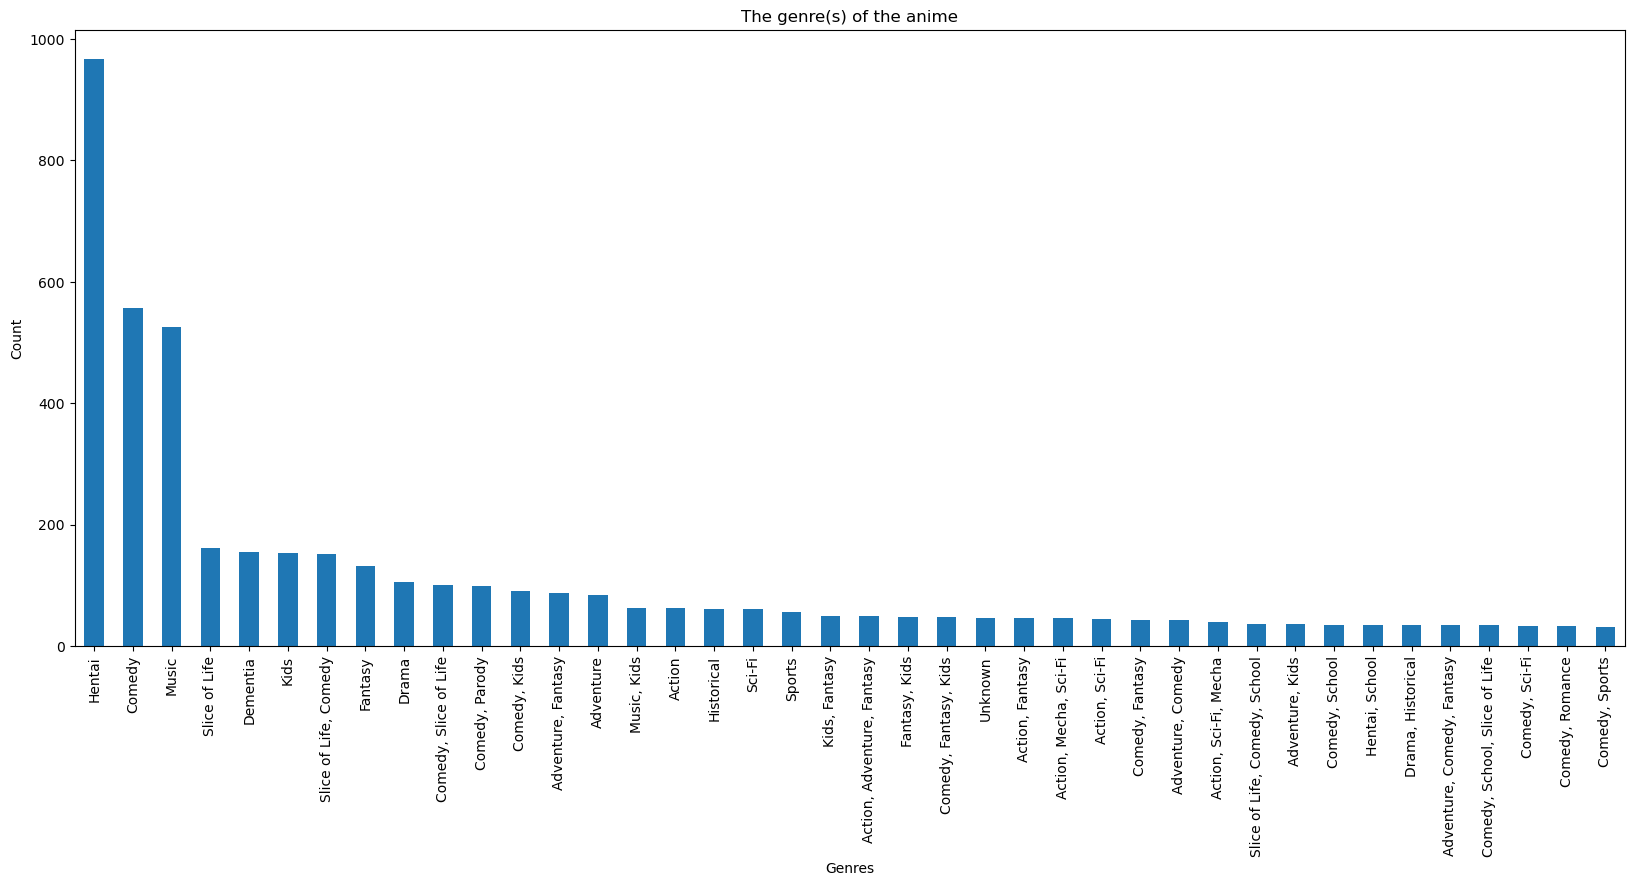

In [28]:
genre_counts = anime['Genres'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
genre_counts.plot(kind='bar')
plt.title('The genre(s) of the anime')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph show us about the production companies or studios involved in creating the most anime.**
* Unknown                6152
* NHK                     201
* Pink Pineapple          183
* Sanrio                  125
* Bandai Visual           117
* Fuji TV                 106
* Aniplex                 104
* TV Tokyo                 96
* TV Asahi                 79
* Tokyo Movie Shinsha      68

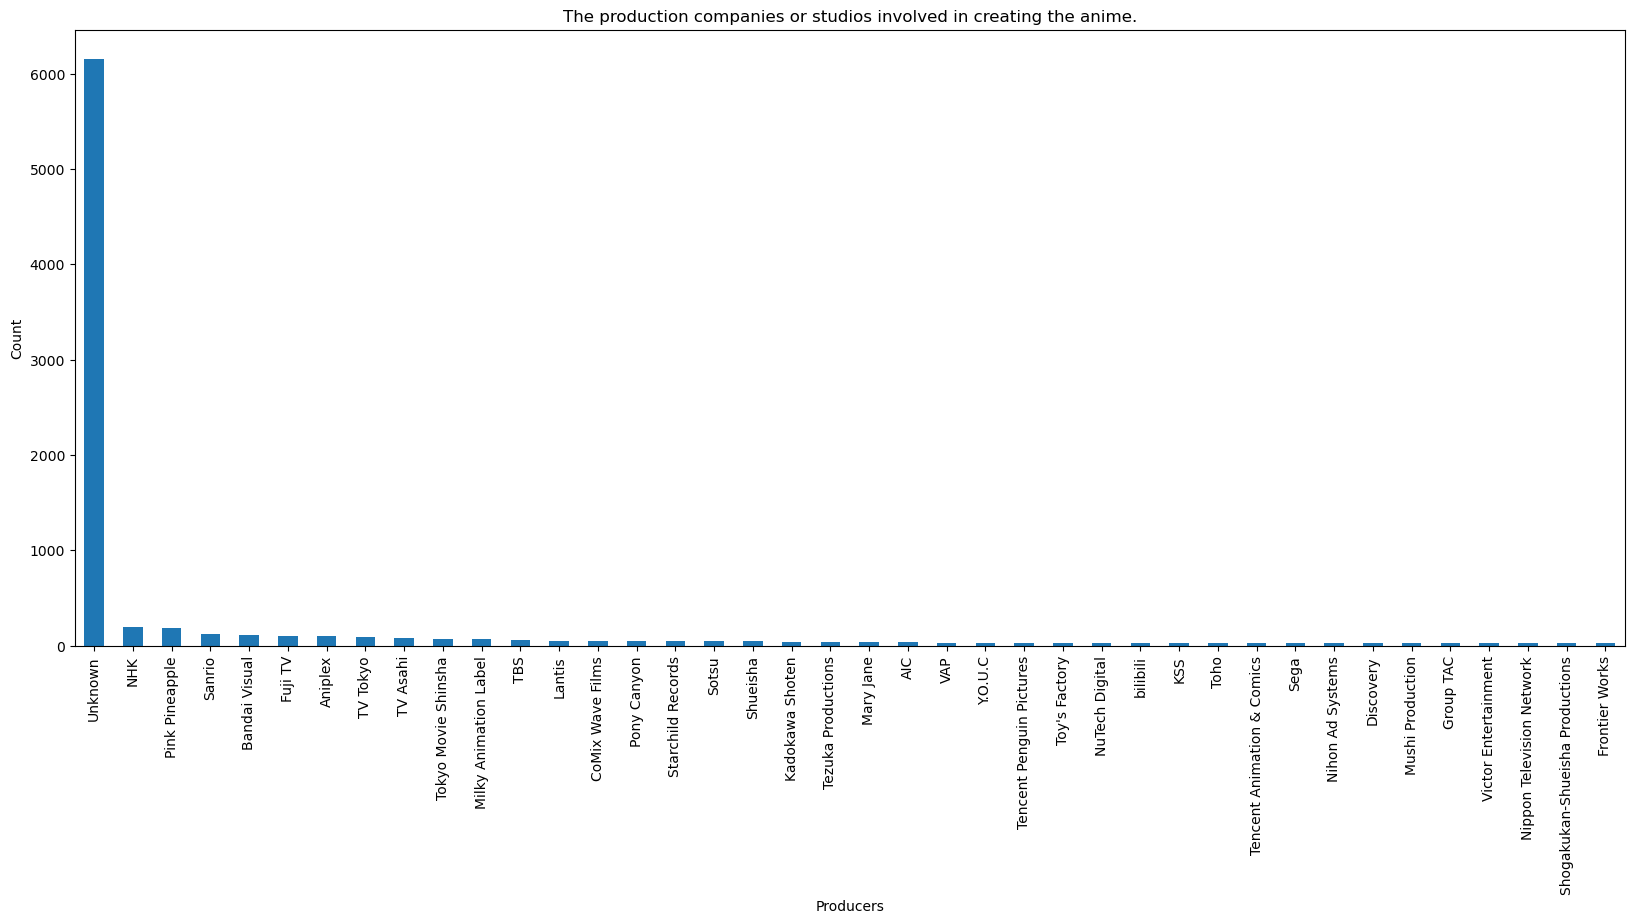

In [29]:
producer_counts = anime['Producers'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
producer_counts.plot(kind='bar')
plt.title('The production companies or studios involved in creating the anime.')
plt.xlabel('Producers')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This graph show us about the date range when the most anime was aired.**
* Unknown           185
* 2021 to ?          40
* 2021               30
* 2004               28
* Apr, 2021 to ?     28
* 2005               27
* 2008               26
* 2002               24
* 2003               24
* 2006               22

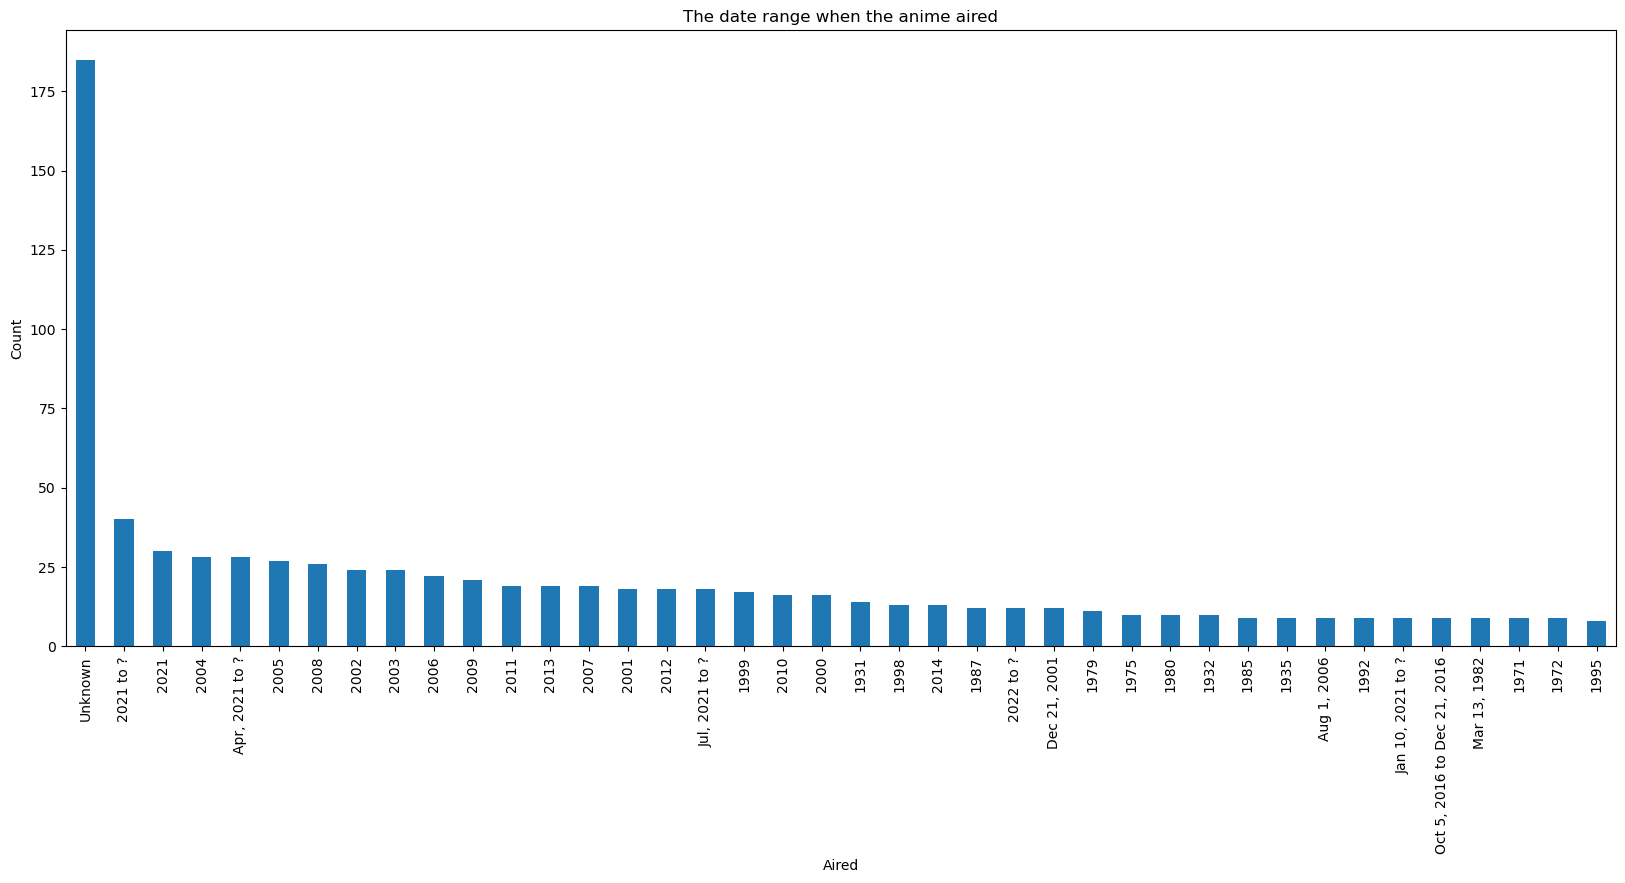

In [30]:
aired_counts = anime['Aired'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
aired_counts.plot(kind='bar')
plt.title('The date range when the anime aired')
plt.xlabel('Aired')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [31]:
import seaborn as sns

In [32]:
anime.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


<Axes: xlabel='anime_id', ylabel='Dropped'>

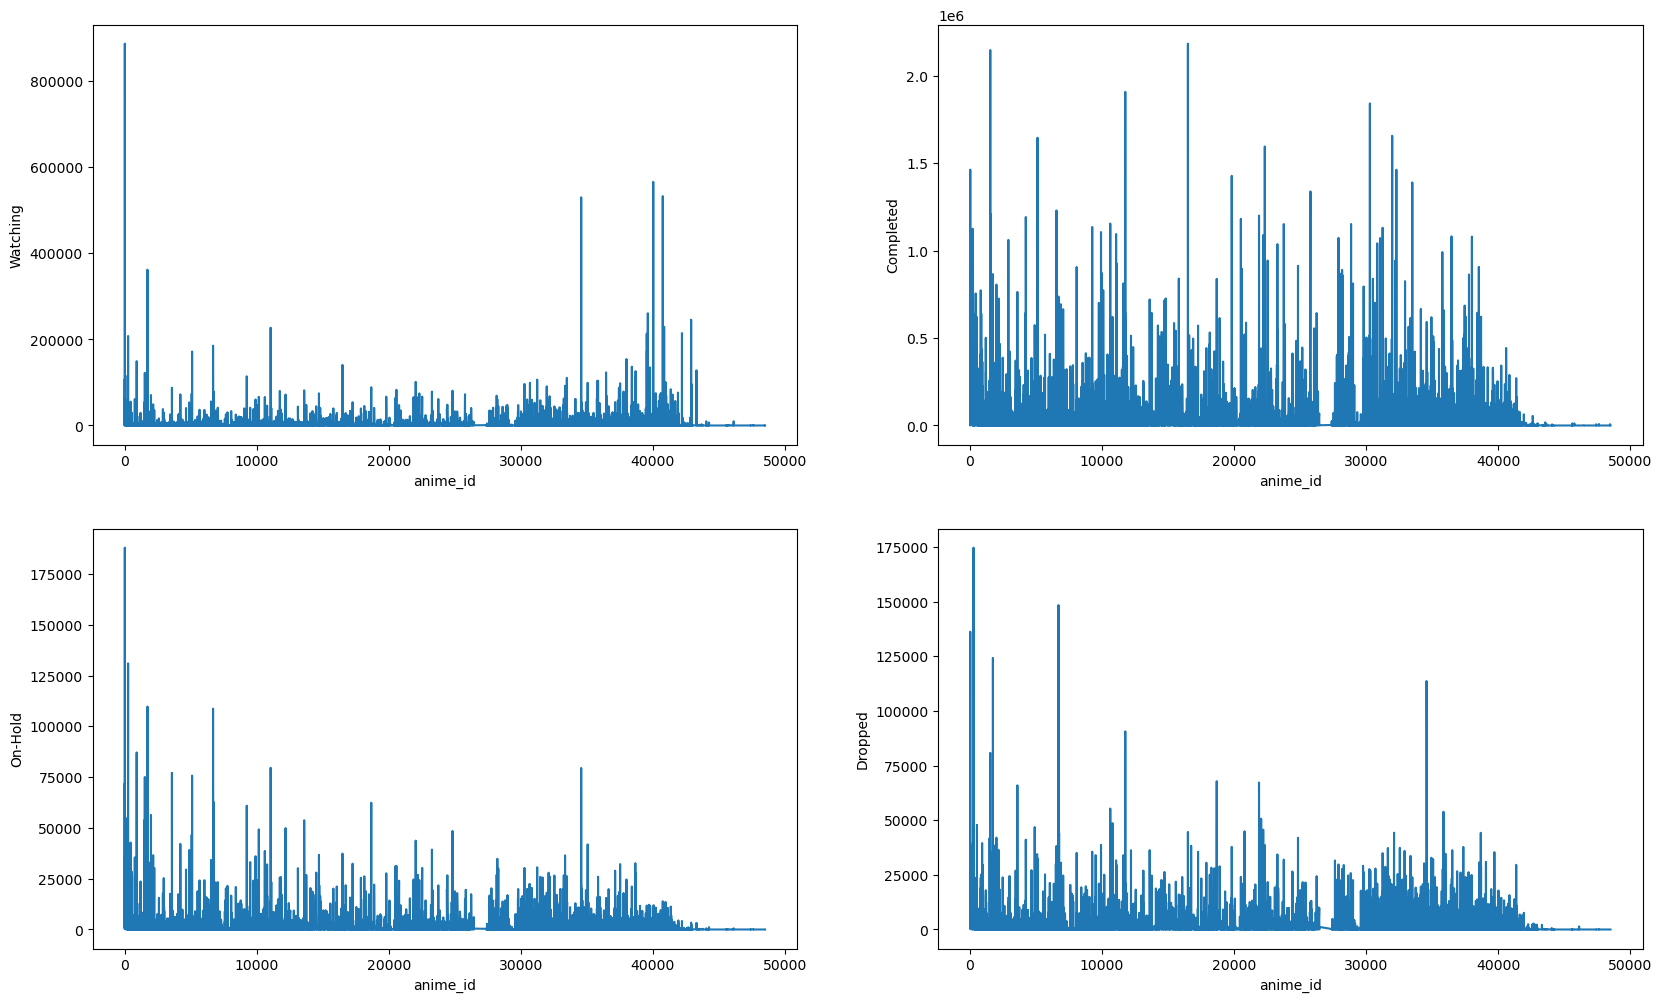

In [33]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(data=anime,x=anime['anime_id'],y=anime['Watching'])
plt.subplot(2,2,2)
sns.lineplot(data=anime,x=anime['anime_id'],y=anime['Completed'])
plt.subplot(2,2,3)
sns.lineplot(data=anime,x=anime['anime_id'],y=anime['On-Hold'])
plt.subplot(2,2,4)
sns.lineplot(data=anime,x=anime['anime_id'],y=anime['Dropped'])

<Axes: xlabel='Source', ylabel='Dropped'>

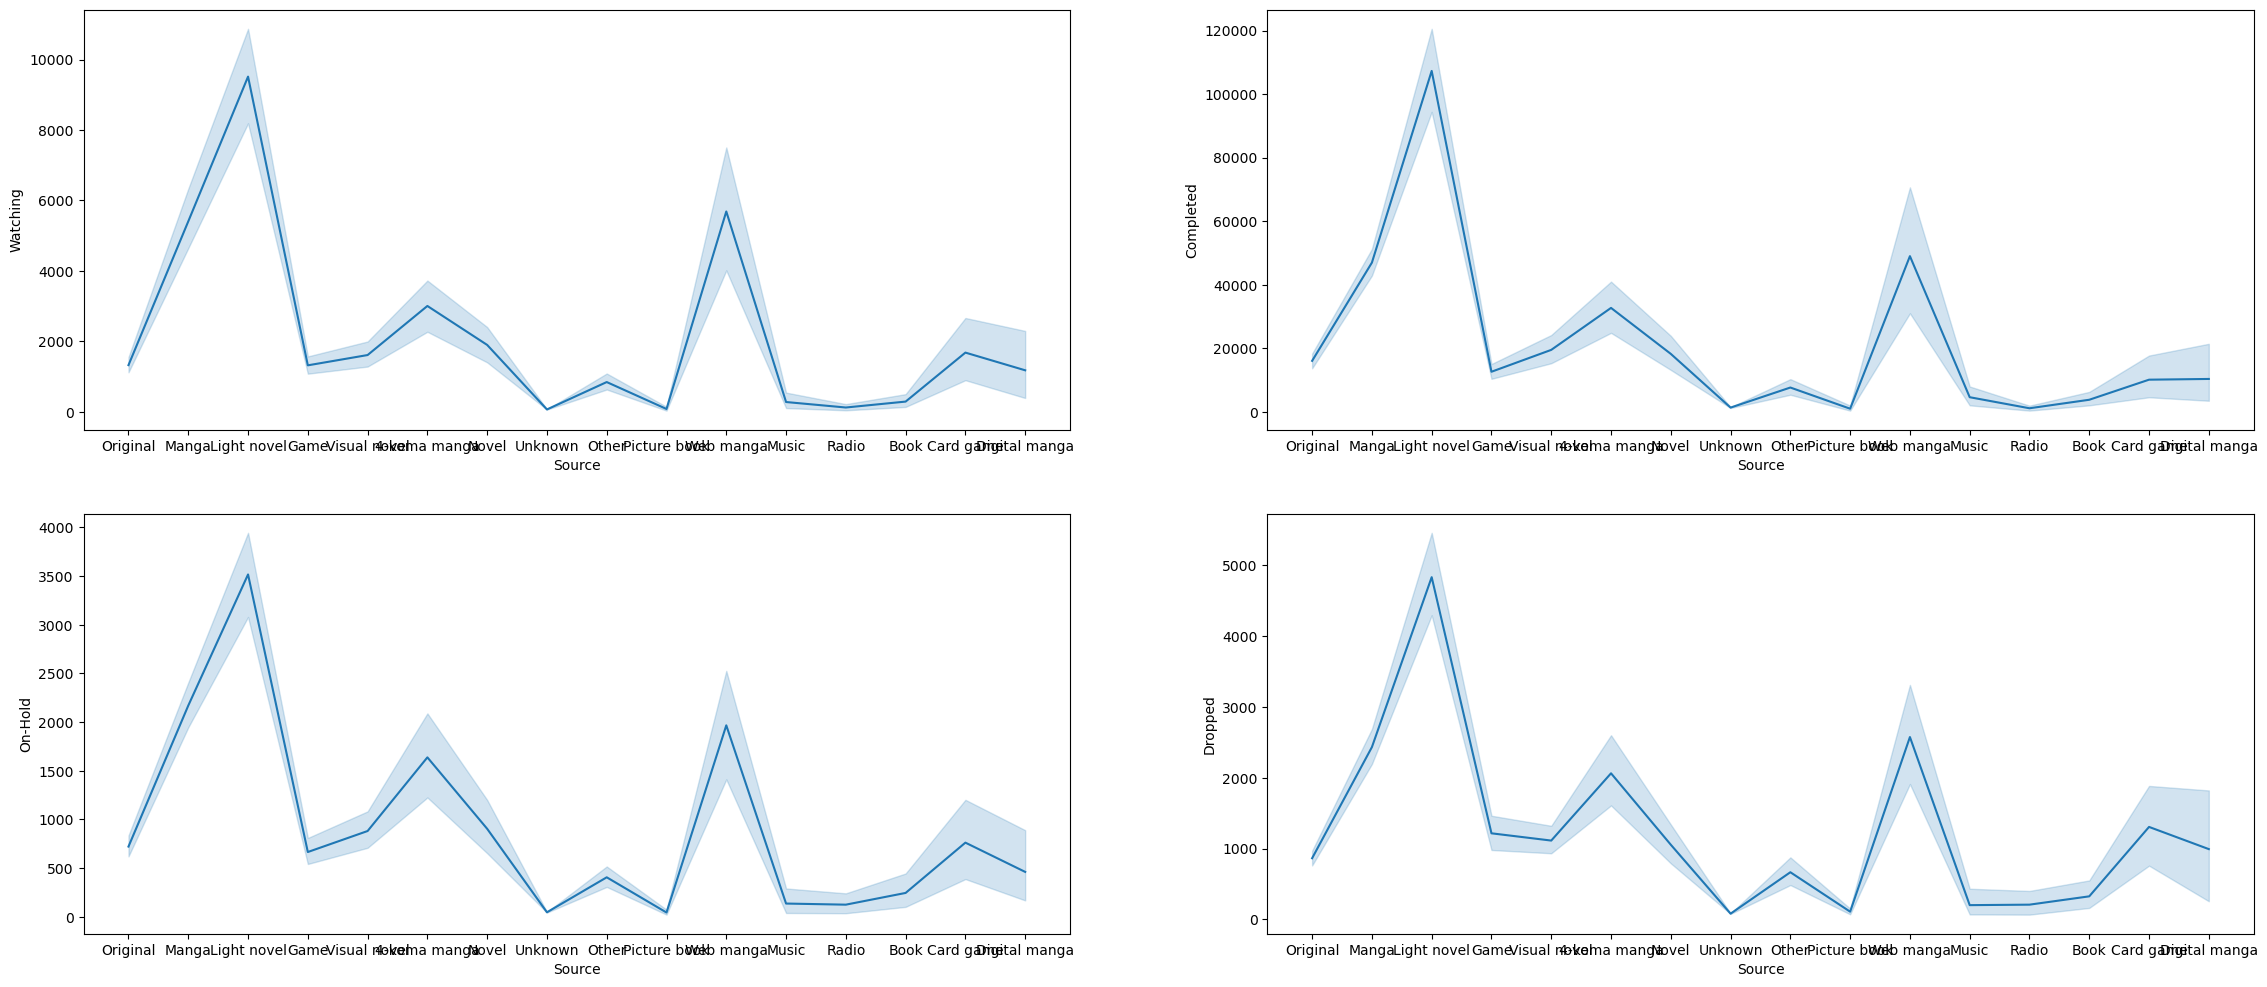

In [34]:
plt.figure(figsize=(28,12))
plt.subplot(2,2,1)
sns.lineplot(data=anime,x=anime['Source'],y=anime['Watching'])
plt.subplot(2,2,2)
sns.lineplot(data=anime,x=anime['Source'],y=anime['Completed'])
plt.subplot(2,2,3)
sns.lineplot(data=anime,x=anime['Source'],y=anime['On-Hold'])
plt.subplot(2,2,4)
sns.lineplot(data=anime,x=anime['Source'],y=anime['Dropped'])

<Axes: xlabel='Type', ylabel='Dropped'>

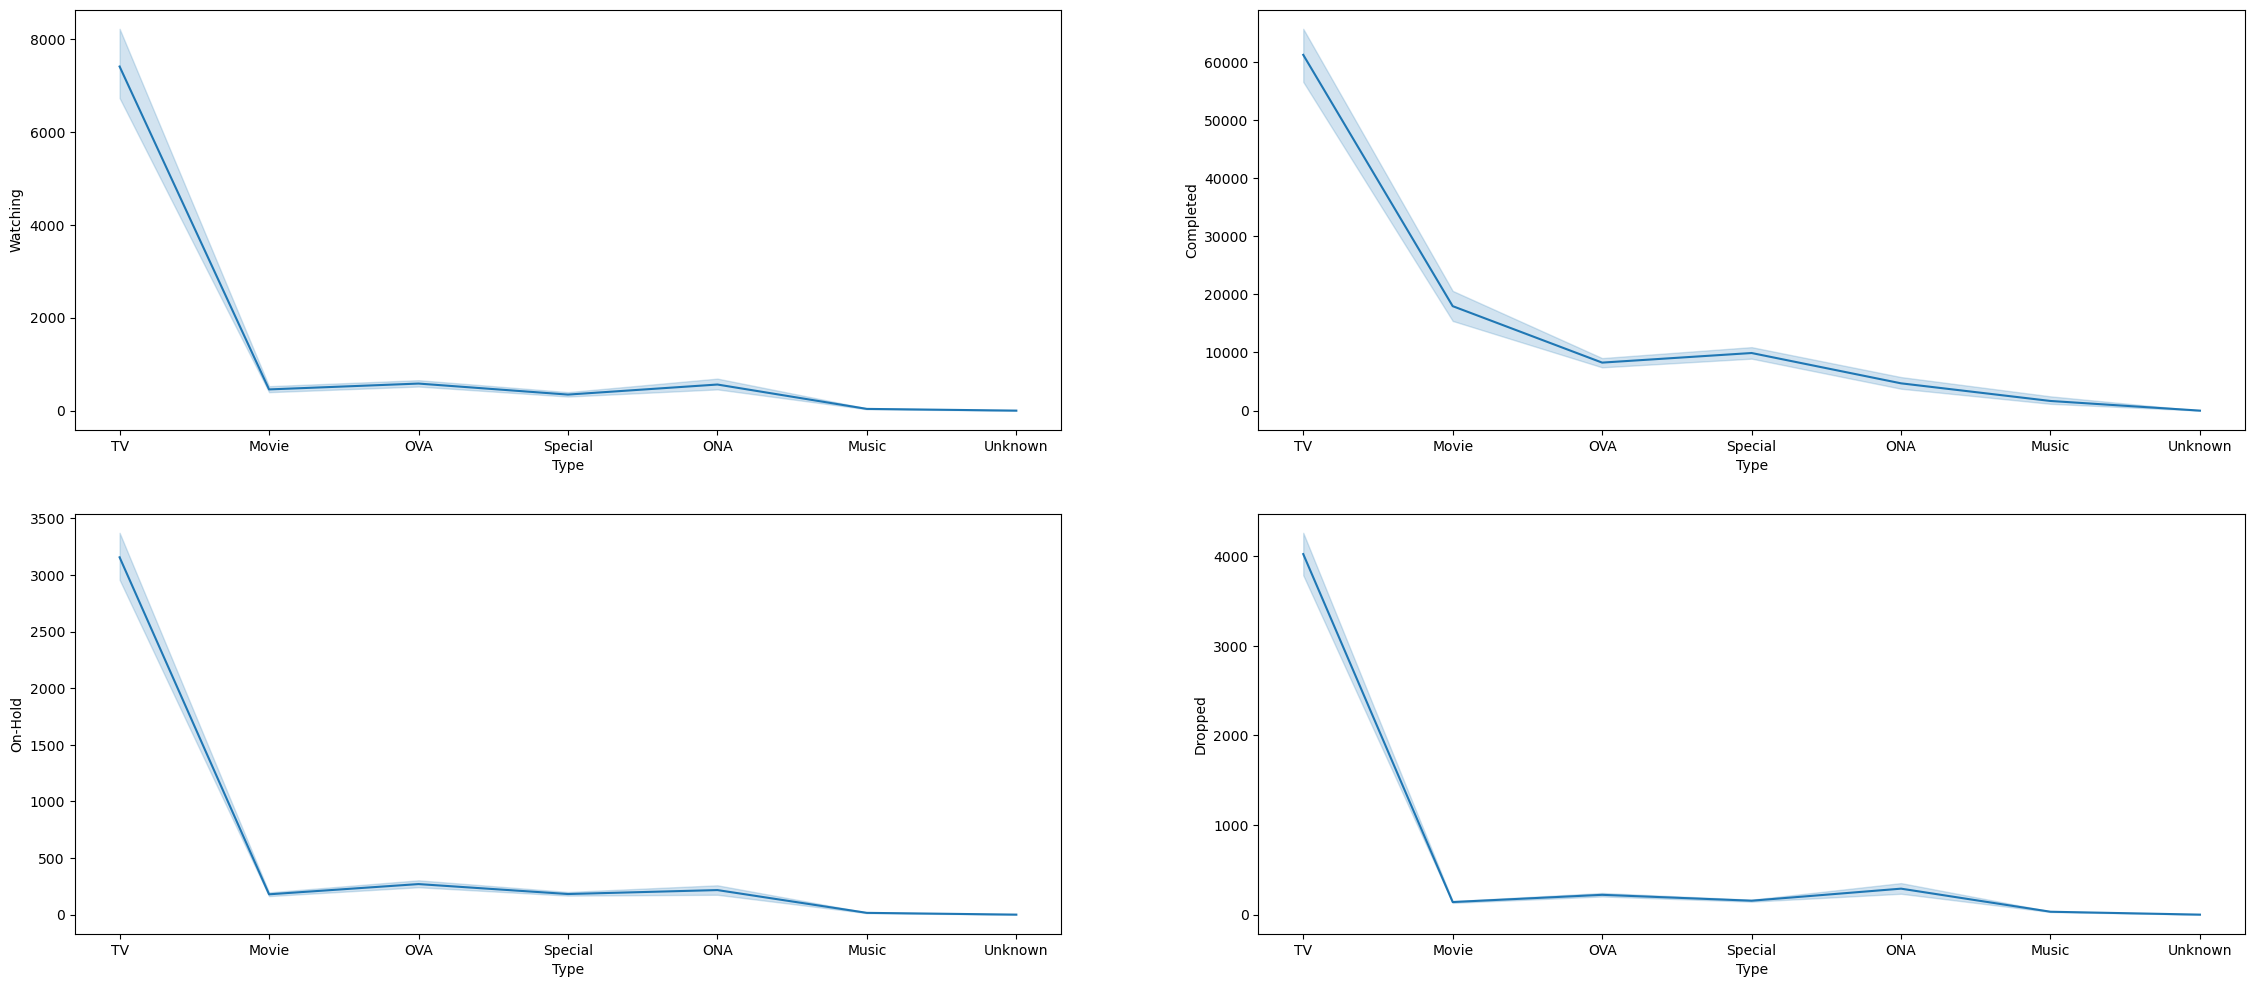

In [35]:
plt.figure(figsize=(28,12))
plt.subplot(2,2,1)
sns.lineplot(data=anime,x=anime['Type'],y=anime['Watching'])
plt.subplot(2,2,2)
sns.lineplot(data=anime,x=anime['Type'],y=anime['Completed'])
plt.subplot(2,2,3)
sns.lineplot(data=anime,x=anime['Type'],y=anime['On-Hold'])
plt.subplot(2,2,4)
sns.lineplot(data=anime,x=anime['Type'],y=anime['Dropped'])

<Axes: xlabel='Episodes', ylabel='Dropped'>

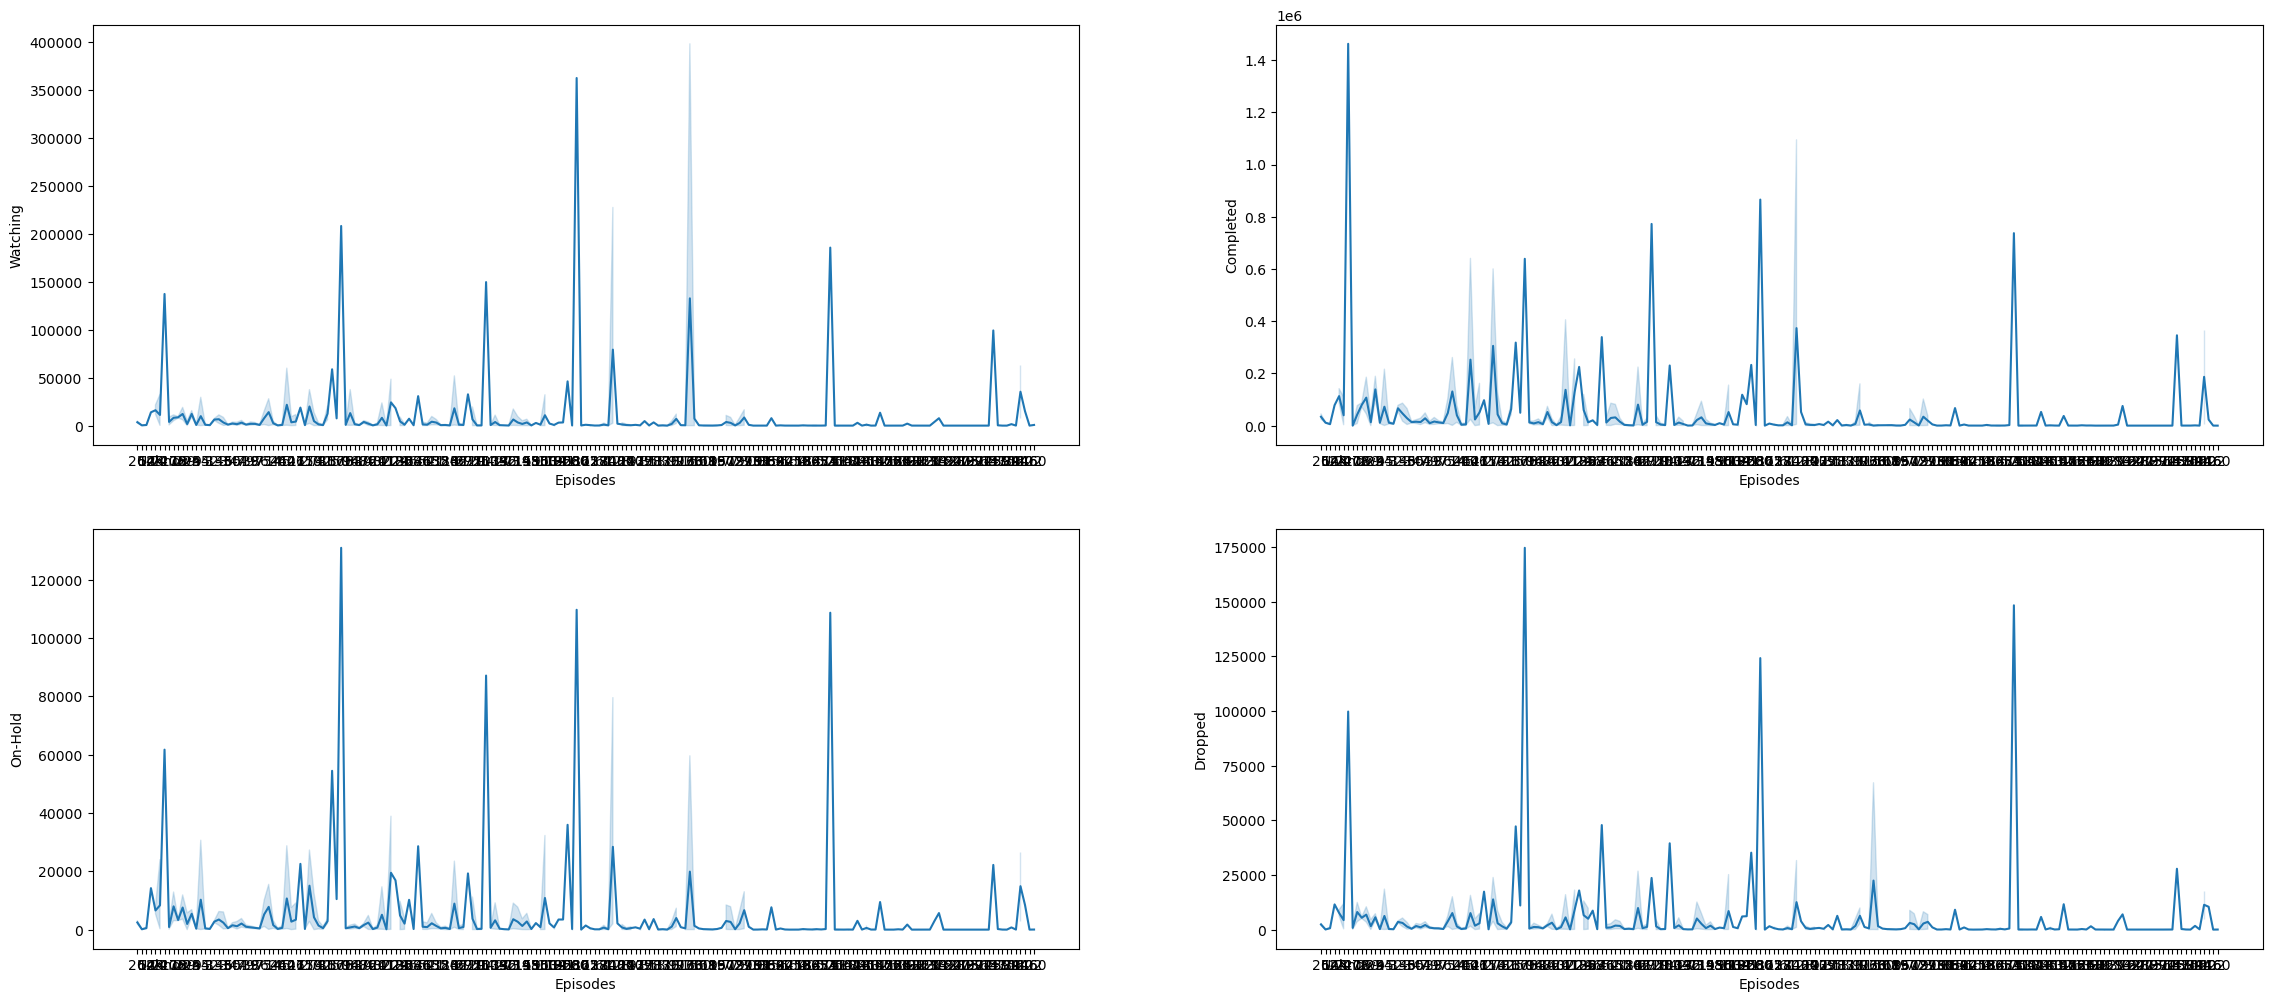

In [36]:
plt.figure(figsize=(28,12))
plt.subplot(2,2,1)
sns.lineplot(data=anime,x=anime['Episodes'],y=anime['Watching'])
plt.subplot(2,2,2)
sns.lineplot(data=anime,x=anime['Episodes'],y=anime['Completed'])
plt.subplot(2,2,3)
sns.lineplot(data=anime,x=anime['Episodes'],y=anime['On-Hold'])
plt.subplot(2,2,4)
sns.lineplot(data=anime,x=anime['Episodes'],y=anime['Dropped'])

<Axes: xlabel='Rating', ylabel='Dropped'>

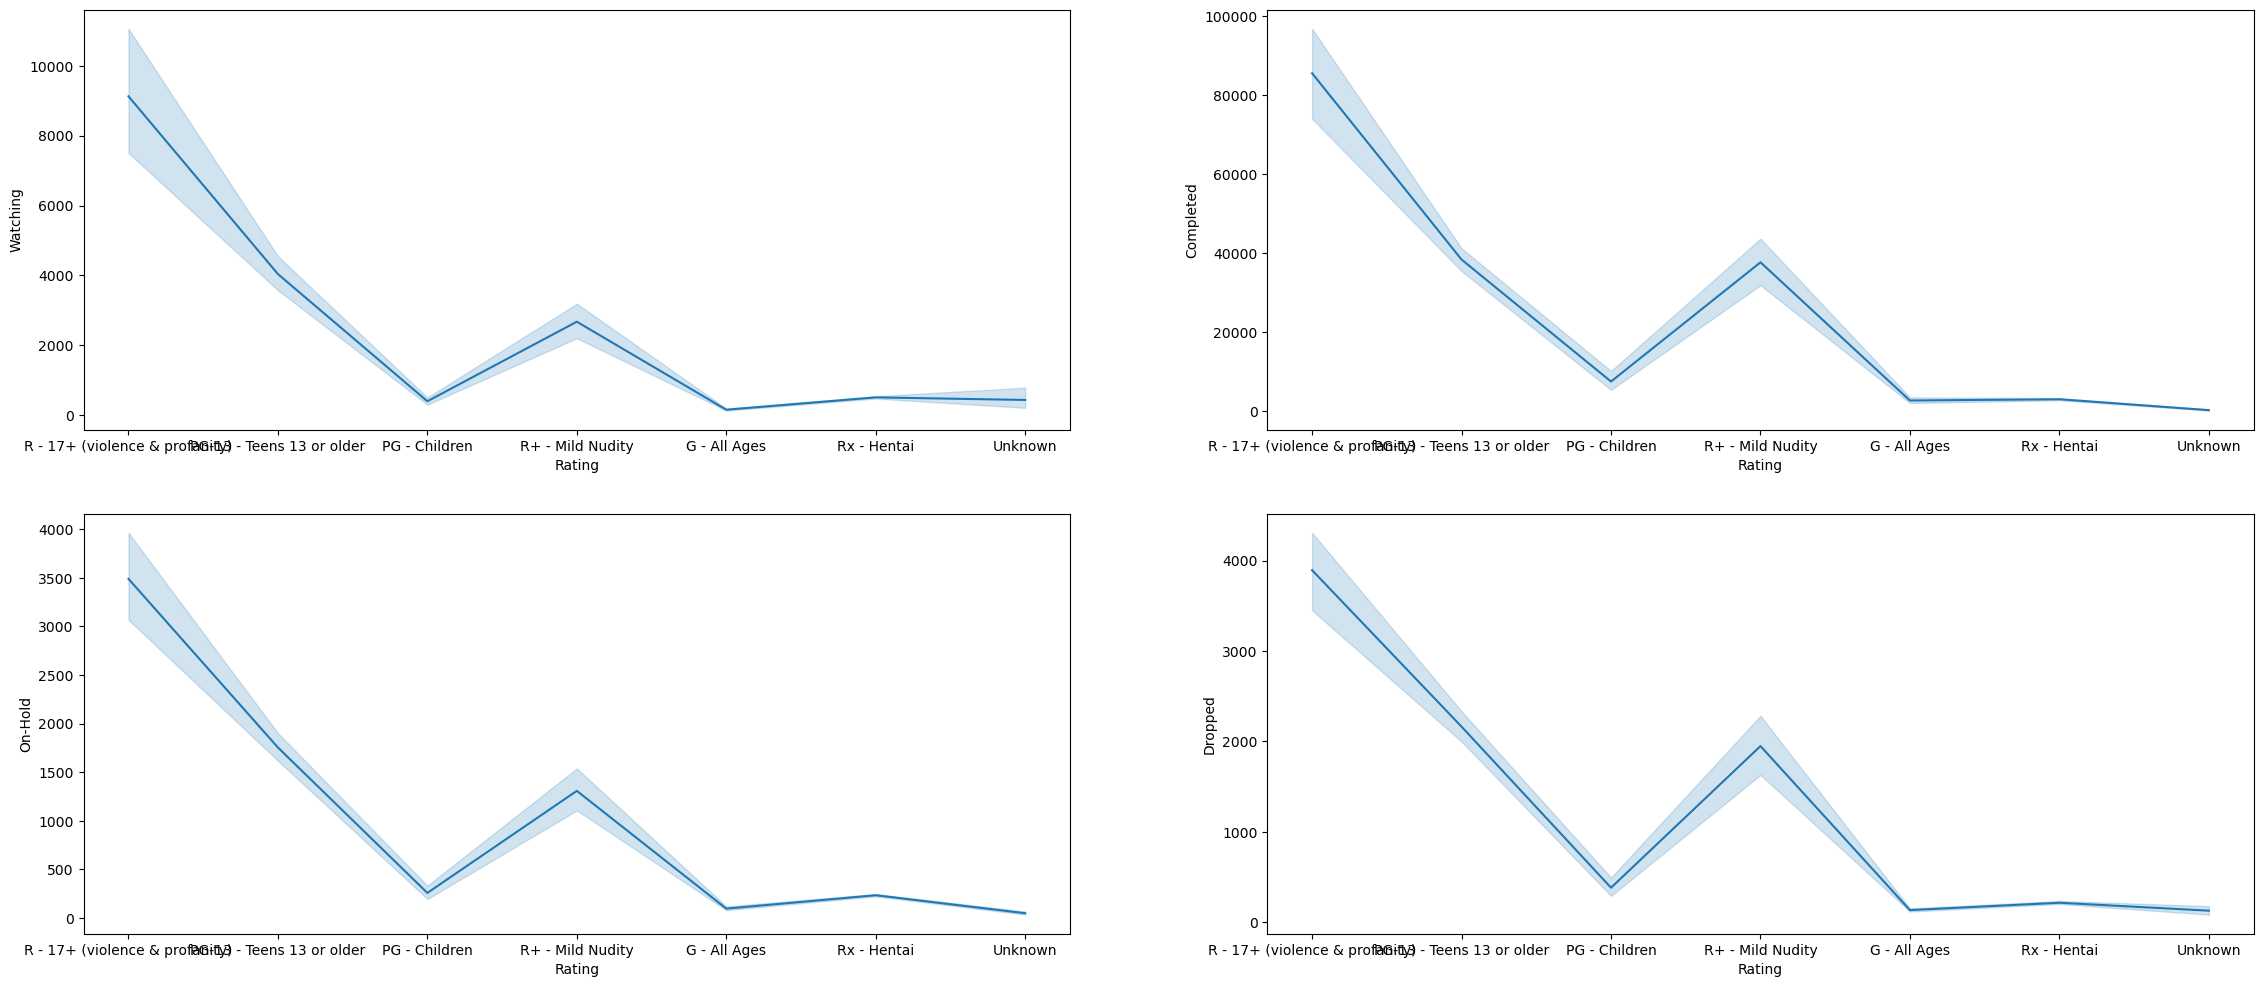

In [37]:
plt.figure(figsize=(28,12))
plt.subplot(2,2,1)
sns.lineplot(data=anime,x=anime['Rating'],y=anime['Watching'])
plt.subplot(2,2,2)
sns.lineplot(data=anime,x=anime['Rating'],y=anime['Completed'])
plt.subplot(2,2,3)
sns.lineplot(data=anime,x=anime['Rating'],y=anime['On-Hold'])
plt.subplot(2,2,4)
sns.lineplot(data=anime,x=anime['Rating'],y=anime['Dropped'])

In [38]:
# user = pd.read_csv('/kaggle/input/myanimelist-dataset/final_animedataset.csv')
# user.head()

# Rating Dataset

In [39]:
# rating = pd.read_csv('/kaggle/input/myanimelist-dataset/user-filtered.csv')
# rating.head()

In [40]:
# rating.shape